In [ ]:
                                         # KNN #

# used dataset ('glass')

#Prepare a model for glass classification using KNN

#Data Description:

#RI : refractive index

#Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

#Mg: Magnesium

#AI: Aluminum

#Si: Silicon

#K:Potassium

#Ca: Calcium

#Ba: Barium

#Fe: Iron

#Type: Type of glass: (class attribute)
#1 -- building_windows_float_processed
# 2 --building_windows_non_float_processed
# 3 --vehicle_windows_float_processed
# 4 --vehicle_windows_non_float_processed (none in this database)
# 5 --containers
## 7 --headlamps


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df = pd.read_csv('/content/glass.csv', names=columns, skiprows=1)

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop('Type', axis=1)
y = df['Type']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a KNN model
knn_model = KNeighborsClassifier()

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': range(1, 21)}

In [ ]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

In [ ]:
# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

In [ ]:
# Train the model with the best k value
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


In [ ]:
# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       0.71      0.71      0.71        14
           3       0.67      0.67      0.67         3
           5       1.00      0.75      0.86         4
           6       0.75      1.00      0.86         3
           7       1.00      0.88      0.93         8

    accuracy                           0.77        43
   macro avg       0.80      0.79      0.79        43
weighted avg       0.78      0.77      0.77        43



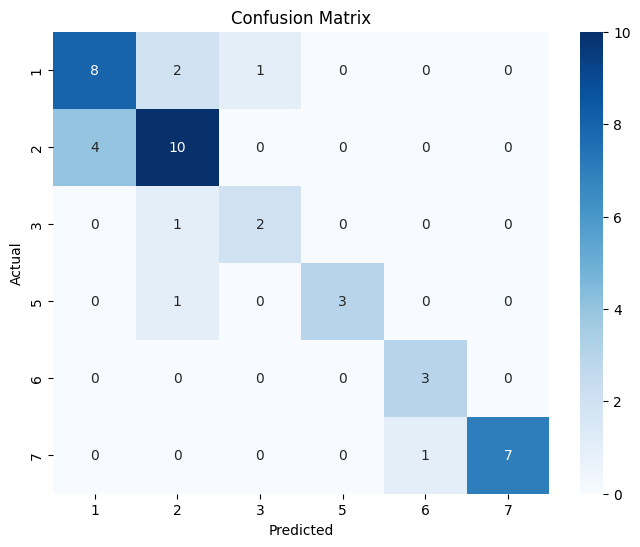

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df['Type'].unique(), yticklabels=df['Type'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

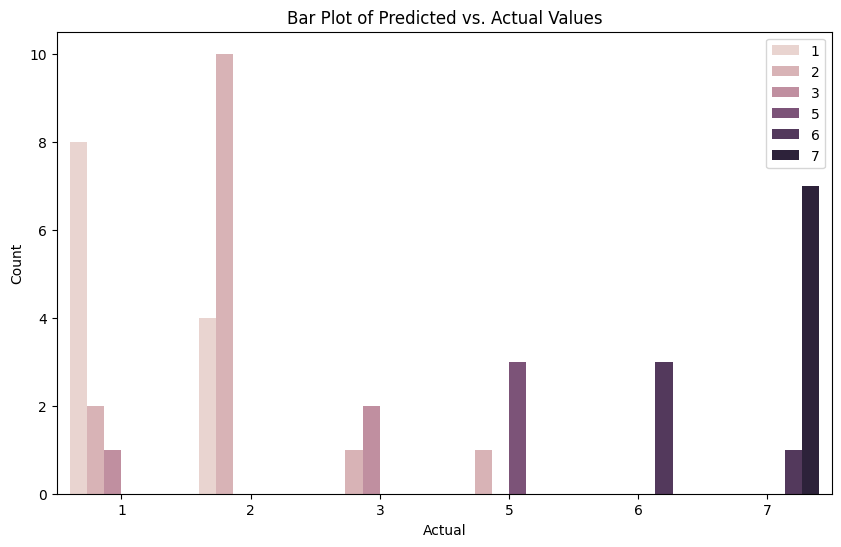

In [ ]:
# Bar plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, hue=y_pred)
plt.title('Bar Plot of Predicted vs. Actual Values')
plt.xlabel('Actual')
plt.ylabel('Count')
plt.show()

In [ ]:
# Perform K-Fold Cross-Validation
k_values = range(1, 21)  # can adjust the range as needed
cv_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

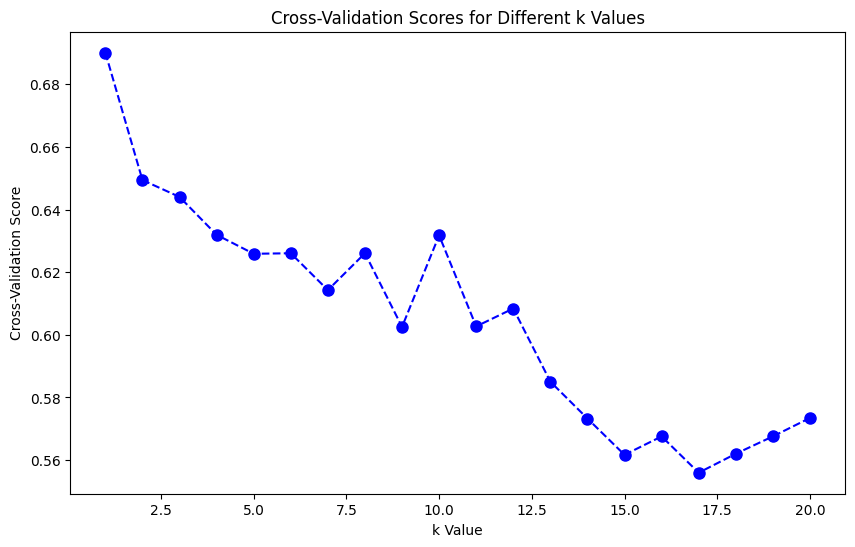

In [ ]:
# Plot the cross-validation scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='blue', markersize=8)
plt.title('Cross-Validation Scores for Different k Values')
plt.xlabel('k Value')
plt.ylabel('Cross-Validation Score')
plt.show()

In [ ]:
# Print the optimal k value
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal k value: {optimal_k}")

Optimal k value: 1
